<FONT COLOR="RED" SIZE="6">FEATURE SELECTION: Wrapper Methods</FONT>
<P><FONT COLOR="yELLOW" SIZE="4">1_Recursive Feature Elimination</FONT>


Recursive Feature Elimination (RFE) is a feature selection technique used to select the most relevant features in a dataset. It works by recursively training a model, ranking features by their importance, and removing the least important ones until a desired number of features is reached.

<b>Steps:</b>
<ol>
    <li>Load the dataset: Use the sklearn.datasets module to load the Wine dataset.</li>
    <li> Split the data: Divide the dataset into training and test sets.</li>
    <li> Initialize a model: Choose a machine learning model, such as a logistic regression or random forest classifier.</li>
     <li>Apply RFE: Use sklearn.feature_selection.RFE to perform feature elimination.</li>
     <li>Evaluate the model: Assess the performance of the model with the selected features.</li></ol>

In [12]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

In [14]:
# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [15]:
# Train the model on reduced features
model.fit(X_train_rfe, y_train)

# Evaluate the model
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
print("Selected Features:", rfe.support_)
print("Ranking of Features:", rfe.ranking_)
print("Model Accuracy with Selected Features:", accuracy)

Selected Features: [ True False False False False False  True False False  True False  True
  True]
Ranking of Features: [1 7 8 6 4 3 1 9 5 1 2 1 1]
Model Accuracy with Selected Features: 1.0


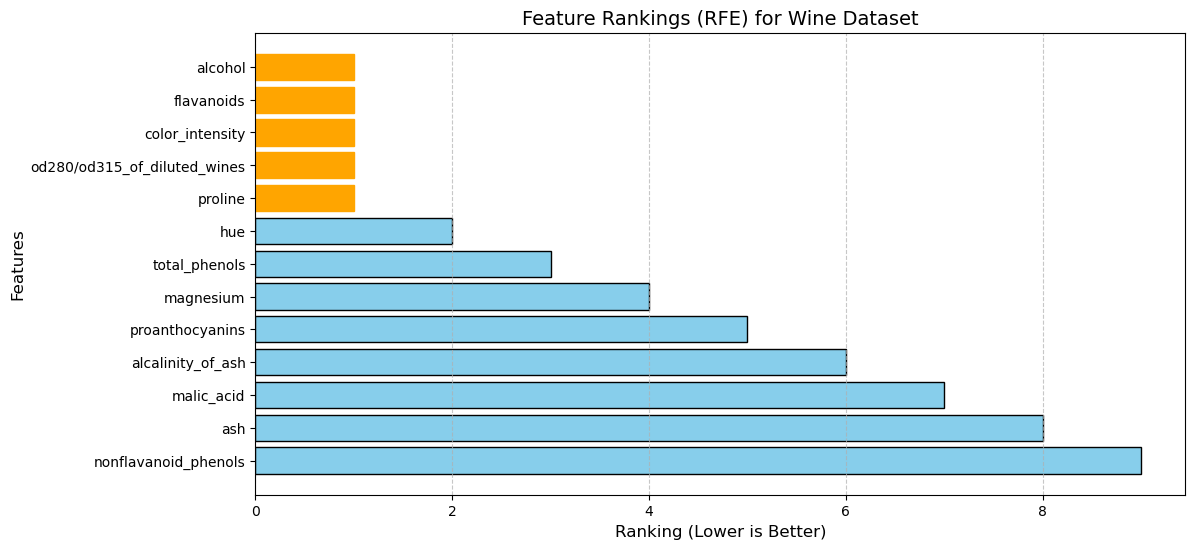

In [17]:
# Extract rankings and selected features
rankings = rfe.ranking_
selected_features = rfe.support_
# Prepare data for plotting
sorted_indices = np.argsort(rankings)  # Sort features by their rankings
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_rankings = rankings[sorted_indices]

# Plot the feature rankings
plt.figure(figsize=(12, 6))
bars = plt.barh(sorted_feature_names, sorted_rankings, color='skyblue', edgecolor='black')

# Highlight selected features in a different color
for i, bar in enumerate(bars):
    if sorted_rankings[i] == 1:  # Rank 1 indicates selected features
        bar.set_color('orange')

# Add plot details
plt.title("Feature Rankings (RFE) for Wine Dataset", fontsize=14)
plt.xlabel("Ranking (Lower is Better)", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
